# Árvore de decisão


Atividade de árvore de decisão para classificação da adoção do eReader.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Autor: Umberto Nunes

-------------------------------------------------------------------------------

### Base de dados: Atividade - Arvore de decisao - Bases.xlsx

Base fornecida em sala de aula.

1.134 instâncias

10 atributos 

4 classes (Early Adopter, Easly Majority, Innovator, Late Majority)




In [1]:
!pip install pydotplus
!pip install dtreeviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

### Carga dos dados e particionamento das bases de treinamento e teste

### Transformação de dados

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


### Particionamento da base

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

No código a seguir, são utilizados 10% para teste e 90% para treinamento.

Além disso, a base já contém uma divisão própria de dados para predição com o modelo treinado. A variável "ereader_treinamento" vai ser usada para criar e testar o modelo com o train_test_split. Já a variável "ereader_validacao" será usada para o predict do modelo final.







In [ ]:
#Para importar os aquivos direto do disco no Colab

#from google.colab import files
#uploaded = files.upload()

In [3]:
#Para importar os aquivos direto do Google Drive

#from google.colab import drive
#drive.mount('/content/drive')
#ereader_treinamento = pd.read_excel('/content/drive/My Drive/Pós: Ciência de Dados e Big Data/Machining Learning/Atividade 1/Atividade - Arvore de decisao - Bases.xlsx', sheet_name=0)
#ereader_validacao = pd.read_excel('/content/drive/My Drive/Pós: Ciência de Dados e Big Data/Machining Learning/Atividade 1/Atividade - Arvore de decisao - Bases.xlsx', sheet_name=1)

ereader_treinamento = pd.read_excel('Arvore-de-decisao_Bases.xlsx', sheet_name=0)
ereader_validacao = pd.read_excel('Arvore-de-decisao_Bases.xlsx', sheet_name=1)


ereader_treinamento.head()

,ID_usuário,Gênero,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader
0,9552,M,61,C,Esporádico,Sim,Sim,Sim,Não,Transferência,Late Majority
1,6757,M,27,C,Intermitente,Sim,Não,Sim,Não,Transferência,Innovator
2,3599,F,29,C,Esporádico,Sim,Sim,Sim,Sim,Transferência,Early Adopter
3,6811,M,49,C,Esporádico,Sim,Sim,Sim,Sim,Website,Early Adopter
4,4104,M,29,S,Esporádico,Sim,Sim,Sim,Não,Website,Late Majority


Alguns dados da base não são uteis para a nossa previsão,
como "ID_usuário", que não agrega informação no algoritmo.
Além disso, também vamos remover a informção "Gênero" da base.

In [4]:
del ereader_treinamento['ID_usuário']
del ereader_treinamento['Gênero']

del ereader_validacao['ID_usuário']
del ereader_validacao['Gênero']

# Verificação da alteração no shape dos DataFrame

print(f'Dimensões de Validação: {ereader_validacao.shape}')
print(f'Dimensões de Treinamento: {ereader_treinamento.shape}')

Dimensões de Validação: (473, 8)
Dimensões de Treinamento: (661, 9)


In [5]:
teste = ereader_treinamento.iloc[:,:8] 
teste.head()

,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento
0,61,C,Esporádico,Sim,Sim,Sim,Não,Transferência
1,27,C,Intermitente,Sim,Não,Sim,Não,Transferência
2,29,C,Esporádico,Sim,Sim,Sim,Sim,Transferência
3,49,C,Esporádico,Sim,Sim,Sim,Sim,Website
4,29,S,Esporádico,Sim,Sim,Sim,Não,Website


In [6]:
X_dict = ereader_treinamento.iloc[:,:8].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
y = le.fit_transform(ereader_treinamento.iloc[:,8])

# Exibe o dado convertido em dicionario.
print("Atributos:", X_dict)

# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento: {0}".format(X.shape))

print("Labels:", y)

print(y.shape)

# Divisão dos dados

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                                    test_size=0.1, stratify=y)

Atributos: dict_values([{'Idade': 61, 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Não', 'Forma_pagamento': 'Transferência'}, {'Idade': 27, 'Estado_civil': 'C', 'Atividade_no_site': 'Intermitente', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Não', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Não', 'Forma_pagamento': 'Transferência'}, {'Idade': 29, 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Sim', 'Forma_pagamento': 'Transferência'}, {'Idade': 49, 'Estado_civil': 'C', 'Atividade_no_site': 'Esporádico', 'Pesquisou_eletronicos_12m': 'Sim', 'Comprou_eletronicos_12m': 'Sim', 'Pesquisou_mídia_digital_18m': 'Sim', 'Comprou_mídia_digital_18m': 'Sim', 'Forma_

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



Como o modelo não tem uma saída binária na previsão, o critério usando na classificação foi ```gini```. 

Vamos rodar a árvore geral e visualizá-la antes do ajuste de hiperparâmetros e poda.


In [8]:
ereader_tree = DecisionTreeClassifier(random_state=0, criterion='gini')
ereader_tree = ereader_tree.fit(X_train, y_train)
print("Acurácia (base de treinamento):", ereader_tree.score(X_train, y_train))

y_pred = ereader_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Early Adopter', 
                                                          'Early Majority',
                                                          'Innovator',
                                                          'Late Majority']))
      
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=['Early Adopter',
                                                 'Early Majority',
                                                 'Innovator', 'Late Majority'],
                         columns=['Early Adopter (Prev)',
                                  'Early Majority (Prev)',
                                  'Innovator (Prev)', 'Late Majority (Prev)'])
print(cnf_table)

Acurácia (base de treinamento): 0.8686868686868687
Acurácia de previsão: 0.44776119402985076
                precision    recall  f1-score   support

 Early Adopter       0.43      0.43      0.43        21
Early Majority       0.38      0.47      0.42        19
     Innovator       0.50      0.40      0.44        10
 Late Majority       0.57      0.47      0.52        17

      accuracy                           0.45        67
     macro avg       0.47      0.44      0.45        67
  weighted avg       0.46      0.45      0.45        67

                Early Adopter (Prev)  ...  Late Majority (Prev)
Early Adopter                      9  ...                     3
Early Majority                     7  ...                     2
Innovator                          3  ...                     1
Late Majority                      2  ...                     8

[4 rows x 4 columns]


### Exibição da árvore de decisão

In [9]:
from dtreeviz.trees import *

viz = dtreeviz(ereader_tree,
              X_train,
              y_train,
              target_name="Adoção_eReader",
              feature_names=np.arange(0,18),
              class_names=['Early Adopter', 'Early Majority', 'Innovator', 'Late Majority'])  

viz.view()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [10]:
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(ereader_tree, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,18),  
                                class_names=['Early Adopter', 'Early Majority', 
                                             'Innovator', 'Late Majority'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


Output hidden; open in https://colab.research.google.com to view.

###Ajuste do modelo

Busca pelo CCP_alpha para otimização pré-pruning da árvore.

Abaixo, visualizamos o impacto do CCP_alpha na acurácia da árvore.

Assim, conseguimos detrminar o melhor ganho de acurácia de acordo com o ```ccp_alpha``` usado


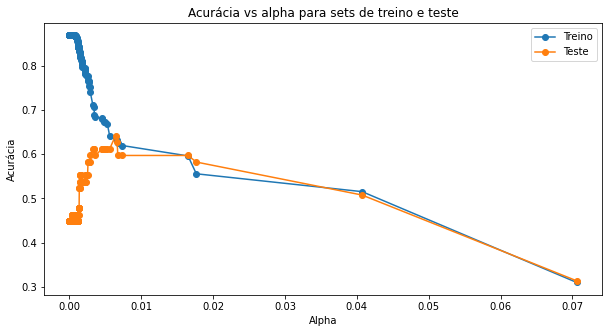

In [11]:
path = ereader_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, criterion='gini', 
                               ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig = plt.figure(figsize=(10, 5))
plt.xlabel('Alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia vs alpha para sets de treino e teste')
plt.plot(ccp_alphas, train_scores, marker='o', label='Treino')
plt.plot(ccp_alphas, test_scores, marker='o', label='Teste')
plt.legend()
plt.show()

Modelo escrito com os ajustes de ccp_alpha e hiperparâmetros.

Na visualização da árevor geral do modelo, percebemos que `min_samples_split` pode ser ajustado para 6, reduzindo a complexidade da árvore sem perda de acurácia.

Neste ponto também foi testada novamente a `entropy` como critério.
Aqui houve ganho de 4% na acurácia de teste com a alteração do paramêtro.

In [12]:
ereader_tree = DecisionTreeClassifier(random_state=0,
                                      criterion='entropy', 
                                      min_samples_split=6,
                                      ccp_alpha=0.006,)
ereader_tree = ereader_tree.fit(X_train, y_train)
print("Acurácia (base de treinamento):", ereader_tree.score(X_train, y_train))

y_pred = ereader_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Early Adopter',
                                                          'Early Majority',
                                                          'Innovator',
                                                          'Late Majority']))
      
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=['Early Adopter',
                                                 'Early Majority',
                                                 'Innovator', 'Late Majority'],
                         columns=['Early Adopter (Prev)', 
                                  'Early Majority (Prev)',
                                  'Innovator (Prev)',
                                  'Late Majority (Prev)'])
print(cnf_table)

Acurácia (base de treinamento): 0.7643097643097643
Acurácia de previsão: 0.6567164179104478
                precision    recall  f1-score   support

 Early Adopter       0.57      0.57      0.57        21
Early Majority       0.70      0.74      0.72        19
     Innovator       0.50      0.30      0.37        10
 Late Majority       0.75      0.88      0.81        17

      accuracy                           0.66        67
     macro avg       0.63      0.62      0.62        67
  weighted avg       0.64      0.66      0.64        67

                Early Adopter (Prev)  ...  Late Majority (Prev)
Early Adopter                     12  ...                     4
Early Majority                     3  ...                     1
Innovator                          6  ...                     0
Late Majority                      0  ...                    15

[4 rows x 4 columns]


### Visualização da árvore final

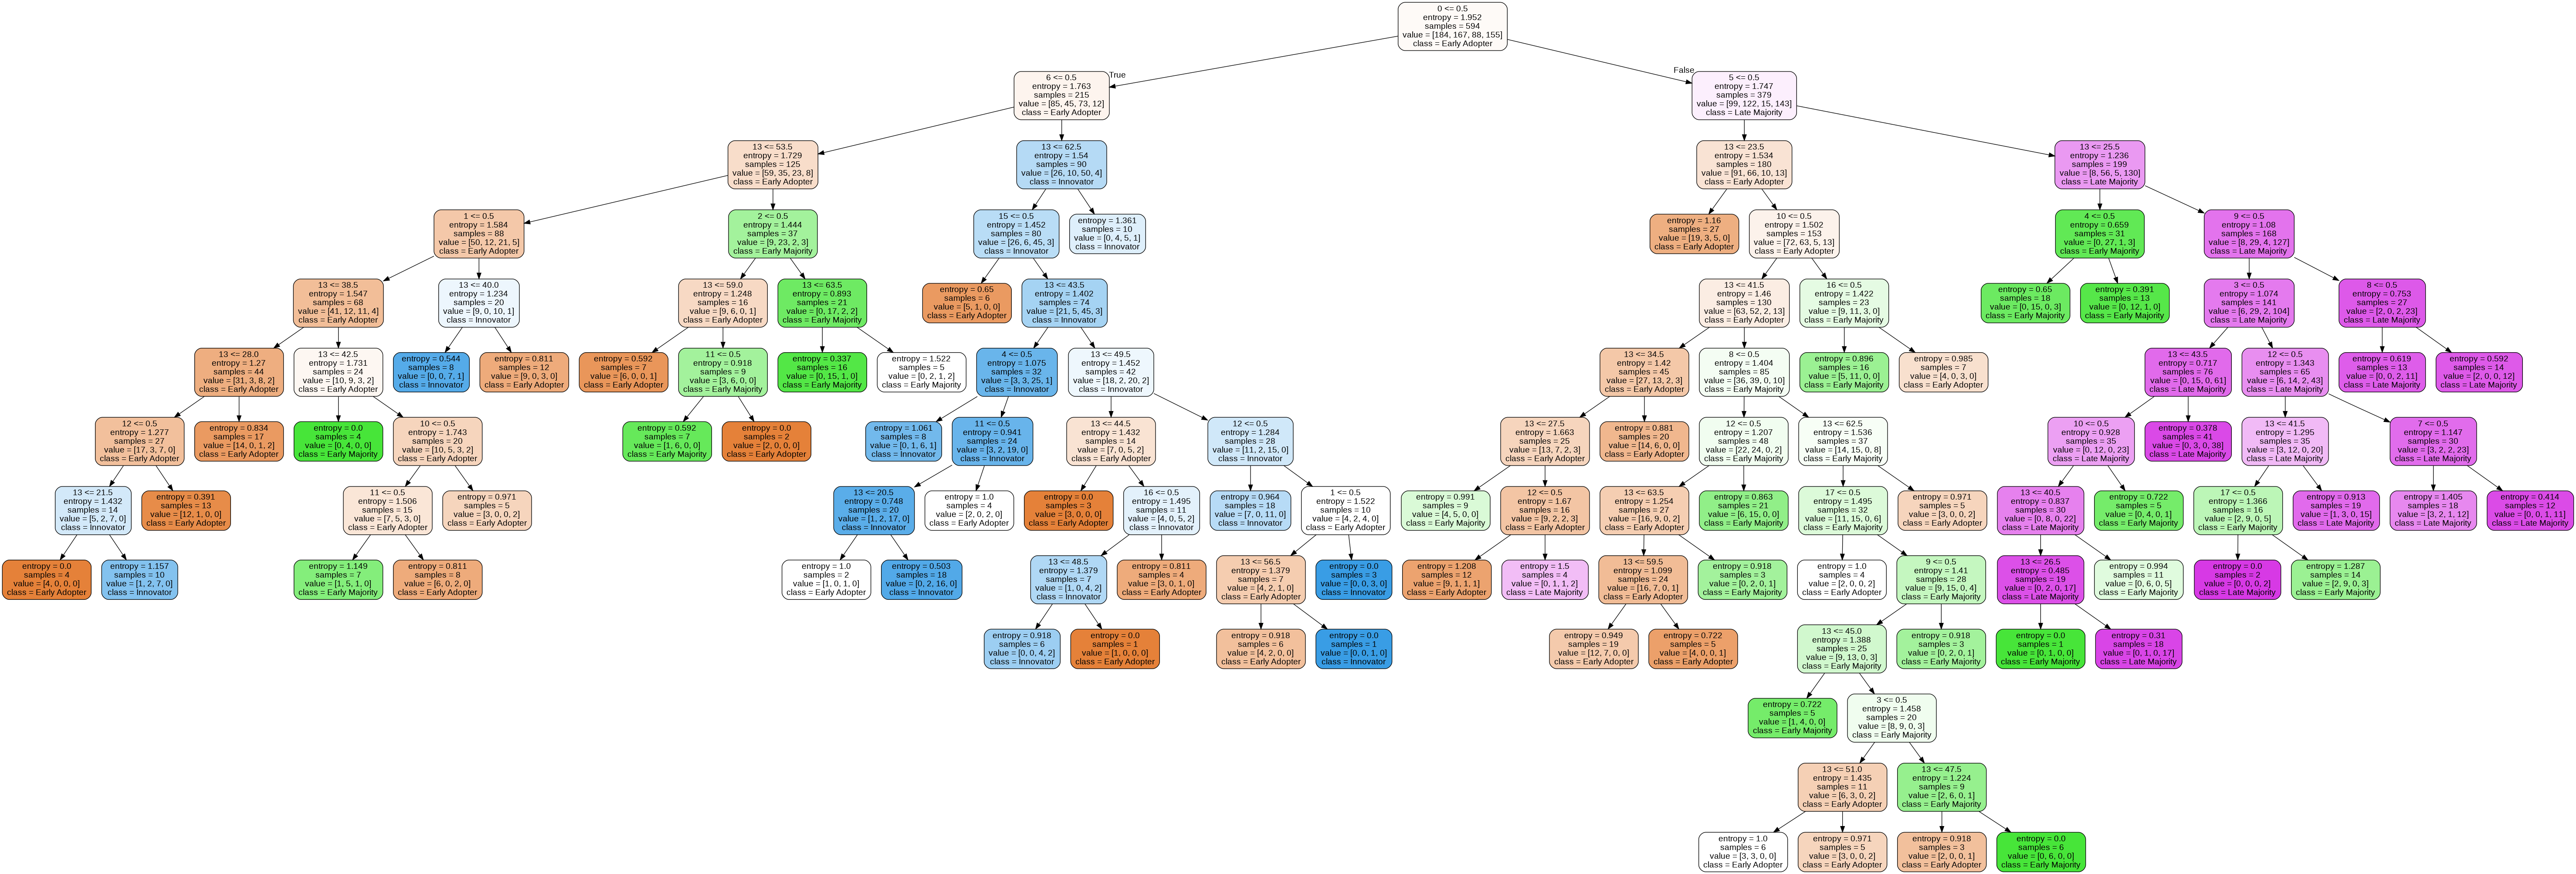

In [13]:
# Create DOT data
dot_data = tree.export_graphviz(ereader_tree, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=np.arange(0,18),  
                                class_names=['Early Adopter', 'Early Majority', 
                                             'Innovator', 'Late Majority'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Previsão dos valores finais


In [14]:
X_dict_validacao = ereader_validacao.iloc[:,:].T.to_dict().values()
X_prev = vect.fit_transform(X_dict_validacao)
y_prev = ereader_tree.predict(X_prev)

ereader_validacao['Adoção_eReader_Prev'] = y_prev



In [15]:
ereader_validacao.head()

,Idade,Estado_civil,Atividade_no_site,Pesquisou_eletronicos_12m,Comprou_eletronicos_12m,Pesquisou_mídia_digital_18m,Comprou_mídia_digital_18m,Forma_pagamento,Adoção_eReader_Prev
0,57,S,Intermitente,Sim,Sim,Sim,Sim,Transferência,2
1,51,C,Intermitente,Sim,Sim,Não,Não,Transferência,0
2,41,C,Esporádico,Sim,Sim,Sim,Não,Website,1
3,66,S,Intermitente,Sim,Sim,Sim,Sim,Cartão de crédito,2
4,31,S,Esporádico,Sim,Não,Sim,Não,Website,3
